# Carga del Datasaet y Transformacion

In [77]:
import pandas as pd

from ucimlrepo import fetch_ucirepo 


def get_data():
    auto_mpg = fetch_ucirepo(id=9) 
    df = pd.DataFrame(auto_mpg.data.features, columns = auto_mpg.data.feature_names)
    df["mpg"] = auto_mpg.data.targets 

    return df.dropna()

# Matriz de correlacion

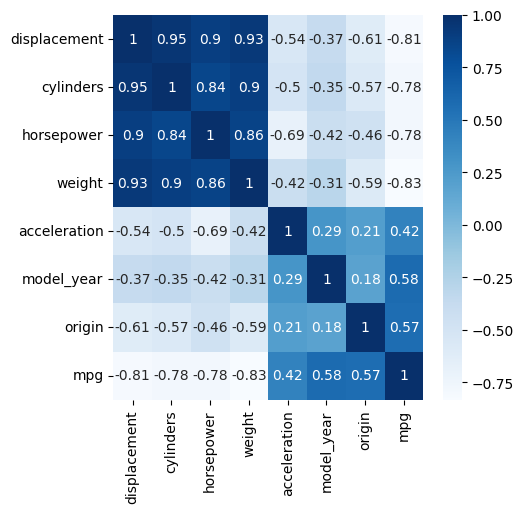

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

df = get_data()
corr = df.corr()

# Matriz de correlación
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap=plt.cm.Blues)
plt.show()

# Aplicacion de lienar regresion con 4 variables

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Dividir los datos en entrenamiento y prueba pero con 4 columnas
df = get_data()
x_data, y_data = df[["cylinders", "displacement", "weight", "acceleration"]], df["mpg"]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)

# Creación del modelo
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluación del modelo
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

MSE:  13.197223398812364
R2:  0.7265368258582259


# Aplicacion de regresion linear con todas las variables

In [82]:
# Dividir los datos en entrenamiento y prueba pero con 4 columnas
df = get_data()
x_data, y_data = df.drop(["mpg"], axis=1), df["mpg"]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)

# Creación del modelo
model = LinearRegression()
model.fit(x_train, y_train)

# predict the test set
y_pred = model.predict(x_test)

# Evaluación del modelo
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

MSE:  12.585248805002669
R2:  0.7901286532197379
